<a href="https://colab.research.google.com/github/kawata1224/Deeplelearning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###ライブラリの読み込み


In [ ]:
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

###学習済みモデルの読み込み

In [ ]:
model = VGG16(weights = 'imagenet')

###画像判定

In [ ]:
def predict(filename, featuresize):
  img = image.load_img(filename, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  preds = model.predict(preprocess_input(x))
  results = decode_predictions(preds, top=featuresize)[0]
  return results

In [ ]:
def showimg(filename,title,i):
  im = Image.open(filename)
  im_list = np.asarray(im)
  plt.subplot(2,5,i)
  plt.title(title)
  plt.axis('off')
  plt.imshow(im_list)

In [ ]:
# wgetでwebからファイルをダウンロードする

# GoogleColabでコマンドを実行するときは、先頭に!マークを必ずつけること

#小さいファイルをGoogleドライブからDLする時は、以下のようにURLをつけるだけでOK！
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt

!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt

--2022-10-04 01:23:48--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 108.177.97.100, 108.177.97.113, 108.177.97.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/33f5p53p8osktl1571pt3v8qui49vgct/1664846625000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=61f0a809-8a61-4c93-8895-f94ba561c64a [following]
--2022-10-04 01:23:49--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/33f5p53p8osktl1571pt3v8qui49vgct/1664846625000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=61f0a809-8a61-4c93-8895-f94ba561c64a
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 142.251.8.1

###Colbに自分のGoogleアカウントのドライブをマウントする

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###*DLしてきたファイルをマウントしたディレクトリにコピーする


In [ ]:
import os
dir_path = "/content/drive/My Drive/2022LATE"
os.makedirs(dir_path, exist_ok=True)
!pwd
!cp train.zip "/content/drive/My Drive/2022LATE"

/content


In [ ]:
!cp "/content/drive/My Drive/2022LATE/train.zip"

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/train.zip'
Try 'cp --help' for more information.


In [ ]:
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


###解凍した画像を使って画像判定させる

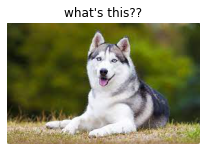

('n02110185', 'Siberian_husky', 0.4568563)
('n02109961', 'Eskimo_dog', 0.4029571)
('n02110063', 'malamute', 0.13029024)
('n02106662', 'German_shepherd', 0.0025464573)
('n02091467', 'Norwegian_elkhound', 0.0019442016)
('n02114367', 'timber_wolf', 0.0005841626)
('n02097209', 'standard_schnauzer', 0.0005747189)
('n03218198', 'dogsled', 0.00050332735)
('n02105641', 'Old_English_sheepdog', 0.00047141127)
('n02097047', 'miniature_schnauzer', 0.00021705266)


In [ ]:
filename="hasky.jpg"
plt.figure(figsize=(20,10))
for i in range(1):
  showimg(filename, "what's this??", i+1)
  plt.show()
  results = predict(filename, 10)
  for result in results:
    print(result)